# Partitioning the contribution of thermodynamic and dynamic change to overall trend in temperature extreme

In [ ]:
import pandas as pd
import scikits.bootstrap as bootstraps
import numpy as np
from matplotlib import pyplot as plt
import proplot as pplot
import cmaps
import xarray as xr
from scipy.stats import linregress
from warnings import simplefilter
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
dataset_src_run = {
    'CanESM5':{
        'historical':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
    },
    'HadGEM3-GC31-LL':{
        'historical':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'hist-GHG':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'hist-nat':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'hist-aer':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'ssp585':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
    },
    'MIROC6':{
        'historical':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
    },
    'IPSL-CM6A-LR':{
        'historical':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r6i1p1f1'], #'r3i1p1f1','r14i1p1f1' are excluded, as there are not corresponding runs in historical forcing
    },
    'MRI-ESM2-0':{
        'historical':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
    },
}


In [ ]:
def get_winner_respect_to_reanalyses_avg(domain,forcing):
    if forcing == 'historical':
        work_dir = '/Users/zeqinhuang/Documents/paper/HWdna/procData/som_winner_relative_to_reanalyses_mean_historical_' + domain + '.csv'
    else:
        work_dir = '/Users/zeqinhuang/Documents/paper/HWdna/procData/som_winner_forings_relative_to_reanalyses_mean_' + forcing + '_' + domain + '.csv'
    winner = pd.read_csv(work_dir,index_col=0)
    return winner

## get pattern occurrence
def count_occur(winner_df,target_patt): 
    years = [i[:4] for i in winner_df.index]
    years = pd.Series(years,index=winner_df.index)
    winner_patt_count_1 = pd.DataFrame()
    winner_patt_count_2 = pd.DataFrame()
    winner_patt_count_3 = pd.DataFrame()
    winner_patt_count_4 = pd.DataFrame()
    for c in winner_df.columns:
        winner_c_df = winner_df[c]
        winner_patt_count_1[c] = winner_c_df.eq(0).groupby(years).sum()
        winner_patt_count_2[c] = winner_c_df.eq(1).groupby(years).sum()
        winner_patt_count_3[c] = winner_c_df.eq(2).groupby(years).sum()
        winner_patt_count_4[c] = winner_c_df.eq(3).groupby(years).sum()
    if target_patt == 0:
        winner_patt_count = winner_patt_count_1
    elif target_patt == 1:
        winner_patt_count = winner_patt_count_2
    elif target_patt == 2:
        winner_patt_count = winner_patt_count_3
    else:
        winner_patt_count = winner_patt_count_4
    return winner_patt_count

## get pattern persistence, pattern persistence is defined as the average duration of a typical pattern in a year
def pattern_persist_cal(listrand,target_patt): ## target_patt must be on of [0,1,2,3]
    count=1
    consec_list = []
    patt_list = []
    for i in range(len(listrand[:-1])):
        if listrand[i] == listrand[i+1]:
            count+=1
        else:
            consec_list.append(count)
            patt_list.append(listrand[i])
            count=1
    consec_list.append(count)        ## consec_list is a list of the consecutive pattern of the listrand
    patt_list.append(listrand[i+1])  ## patt_list is a list of pattern correspond to consec_list
    patt_consec = pd.DataFrame(list(zip(patt_list,consec_list)),columns=['patt','cons'])
    persist = patt_consec['cons'][patt_consec['patt']==target_patt]
    persist = persist.mean()
    return persist

## get pattern maximum duration
def pattern_maximum_duration_cal(listrand,target_patt): ## target_patt must be on of [0,1,2,3]
    count=1
    consec_list = []
    patt_list = []
    for i in range(len(listrand[:-1])):
        if listrand[i] == listrand[i+1]:
            count+=1
        else:
            consec_list.append(count)
            patt_list.append(listrand[i])
            count=1
    consec_list.append(count)        ## consec_list is a list of the consecutive pattern of the listrand
    patt_list.append(listrand[i+1])  ## patt_list is a list of pattern correspond to consec_list
    patt_consec = pd.DataFrame(list(zip(patt_list,consec_list)),columns=['patt','cons'])
    persist = patt_consec['cons'][patt_consec['patt']==target_patt]
    duration = persist.max()
    return duration

def get_hot_extreme_per_pattern(domain,pattern,forcing): ## pattern must be one of [0,1,2,3]
    if forcing not in ['era5','jra55','ncep2']:
        path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/hot_extreme_occur_trend_sig/hot_extreme_per_pattern_occur_patt' + str(pattern+1) + '_variation_' + forcing + '_' + domain +'.csv'
        hot_extreme_per_pattern = pd.read_csv(path,index_col=0)
    else:
        path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/hot_extreme_occur_trend_sig/' + forcing + '_hot_extreme_per_pattern_occur_' + domain +'.csv'
        hot_extreme_per_pattern = pd.read_csv(path,index_col=0)
        hot_extreme_per_pattern = hot_extreme_per_pattern['Pattern' + str(pattern + 1)]
    return hot_extreme_per_pattern

def get_hot_extreme_variation(domain,pattern,forcing):
    if forcing not in ['era5','jra55','ncep2']:
        path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/hot_extreme_occur_trend_sig/hot_extreme_patt' + str(pattern+1) + '_occur_variation_' + forcing + '_' + domain +'.csv'
        hot_extreme_variation = pd.read_csv(path,index_col=0)
    else:
        path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/hot_extreme_occur_trend_sig/hot_extreme_patt' + str(pattern+1) + '_occur_variation_' + 'historical' + '_' + domain +'.csv'
        hot_extreme_variation = pd.read_csv(path,index_col=0)
        hot_extreme_variation = hot_extreme_variation[forcing]
    return hot_extreme_variation

def get_bootstrap_ci(var_df,highlow,alpha=0.05,n_samples=10000):
    if highlow == 'high':
        border = var_df.apply(lambda x:bootstraps.ci(data=x[~np.isnan(x)],alpha=alpha,n_samples=n_samples)[1],axis=1)
    else:
        border = var_df.apply(lambda x:bootstraps.ci(data=x[~np.isnan(x)],alpha=alpha,n_samples=n_samples)[0],axis=1)
    return border

def get_envolop(var_df,highlow):
    if highlow == 'high':
        quantile = 0.95
    else:
        quantile = 0.05
    var_quantile = var_df.quantile(quantile)
    return var_quantile

def _compute_slope(var):
    mask_var = var[~np.isnan(var)]
    slp = linregress(range(len(mask_var)),mask_var).slope
    return slp
    

## plot scaling factors and attributable change in subregions

In [ ]:
scaling_factor_and_trends_2sig = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/scripts/attribution_Ribes/trends_scaling_factors_2signal_GPH.csv',index_col=0)
scaling_factor_and_trends_3sig = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/scripts/attribution_Ribes/trends_scaling_factors_3signal_GPH.csv',index_col=0)

scaling_factor_and_trends_3sig['trend'] = scaling_factor_and_trends_3sig['trend'] * 2
scaling_factor_and_trends_3sig['trend_min'] = scaling_factor_and_trends_3sig['trend_min'] * 2
scaling_factor_and_trends_3sig['trend_max'] = scaling_factor_and_trends_3sig['trend_max'] * 2

pattern_num = {'Pattern 1':0,'Pattern 2':1,'Pattern 3':2,'Pattern 4':3}
regions = ['EU','EAS','WNA']

In [ ]:
for r in range(len(regions)):

    domain = regions[r]

    dynamic_trend_era5_all_patt = pd.DataFrame()
    dynamic_trend_jra55_all_patt = pd.DataFrame()
    dynamic_trend_ncep2_all_patt = pd.DataFrame()
    dynamic_trend_hist_all_patt = pd.DataFrame()
    dynamic_trend_GHG_all_patt  = pd.DataFrame()
    dynamic_trend_aer_all_patt  = pd.DataFrame()
    dynamic_trend_nat_all_patt  = pd.DataFrame()
    thermo_trend_era5_all_patt = pd.DataFrame()
    thermo_trend_jra55_all_patt = pd.DataFrame()
    thermo_trend_ncep2_all_patt = pd.DataFrame()
    thermo_trend_hist_all_patt = pd.DataFrame()
    thermo_trend_GHG_all_patt  = pd.DataFrame()
    thermo_trend_aer_all_patt  = pd.DataFrame()
    thermo_trend_nat_all_patt  = pd.DataFrame()
    interaction_trend_era5_all_patt = pd.DataFrame()
    interaction_trend_jra55_all_patt = pd.DataFrame()
    interaction_trend_ncep2_all_patt = pd.DataFrame()
    interaction_trend_hist_all_patt = pd.DataFrame()
    interaction_trend_GHG_all_patt  = pd.DataFrame()
    interaction_trend_aer_all_patt  = pd.DataFrame()
    interaction_trend_nat_all_patt  = pd.DataFrame()

    for i in range(4):
        patt = i

        winner_era5 = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='historical')
        winner_era5 = winner_era5['era5']
        winner_era5 = winner_era5.to_frame()
        patt_occur_era5 = count_occur(winner_df=winner_era5,target_patt=patt)
        patt_occur_era5_trend = patt_occur_era5.apply(_compute_slope)
        patt_occur_era5_mean = patt_occur_era5.mean()
        hot_extreme_per_pattern_era5 = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='era5')
        hot_extreme_per_pattern_era5.index = patt_occur_era5.index
        hot_extreme_per_pattern_era5 = hot_extreme_per_pattern_era5.to_frame()
        hot_extreme_per_pattern_era5.columns = ['era5']
        hot_extreme_per_pattern_era5_trend = hot_extreme_per_pattern_era5.apply(_compute_slope)
        hot_extreme_per_pattern_era5_mean = hot_extreme_per_pattern_era5.mean()

        winner_jra55 = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='historical')
        winner_jra55 = winner_jra55['jra55']
        winner_jra55 = winner_jra55.to_frame()
        patt_occur_jra55 = count_occur(winner_df=winner_jra55,target_patt=patt)
        patt_occur_jra55_trend = patt_occur_jra55.apply(_compute_slope)
        patt_occur_jra55_mean = patt_occur_jra55.mean()
        hot_extreme_per_pattern_jra55 = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='jra55')
        hot_extreme_per_pattern_jra55.index = patt_occur_jra55.index
        hot_extreme_per_pattern_jra55 = hot_extreme_per_pattern_jra55.to_frame()
        hot_extreme_per_pattern_jra55.columns = ['jra55']
        hot_extreme_per_pattern_jra55_trend = hot_extreme_per_pattern_jra55.apply(_compute_slope)
        hot_extreme_per_pattern_jra55_mean = hot_extreme_per_pattern_jra55.mean()
        
        winner_ncep2 = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='historical')
        winner_ncep2 = winner_ncep2['ncep2']
        winner_ncep2 = winner_ncep2.to_frame()
        patt_occur_ncep2 = count_occur(winner_df=winner_ncep2,target_patt=patt)
        patt_occur_ncep2_trend = patt_occur_ncep2.apply(_compute_slope)
        patt_occur_ncep2_mean = patt_occur_ncep2.mean()
        hot_extreme_per_pattern_ncep2 = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='ncep2')
        hot_extreme_per_pattern_ncep2.index = patt_occur_ncep2.index
        hot_extreme_per_pattern_ncep2 = hot_extreme_per_pattern_ncep2.to_frame()
        hot_extreme_per_pattern_ncep2.columns = ['ncep2']
        hot_extreme_per_pattern_ncep2_trend = hot_extreme_per_pattern_ncep2.apply(_compute_slope)
        hot_extreme_per_pattern_ncep2_mean = hot_extreme_per_pattern_ncep2.mean()
        
        winner_hist = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='historical')
        winner_hist = winner_hist.drop(['era5','jra55','ncep2'],axis=1)
        patt_occur_hist = count_occur(winner_df=winner_hist,target_patt=patt)
        patt_occur_hist_trend = patt_occur_hist.apply(_compute_slope)
        patt_occur_hist_mean = patt_occur_hist.mean()
        hot_extreme_per_pattern_hist = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='historical')
        hot_extreme_per_pattern_hist.index = patt_occur_hist.index
        hot_extreme_per_pattern_hist_trend = hot_extreme_per_pattern_hist.apply(_compute_slope)
        hot_extreme_per_pattern_hist_mean = hot_extreme_per_pattern_hist.mean()

        winner_GHG = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='hist-GHG')
        patt_occur_GHG = count_occur(winner_df=winner_GHG,target_patt=patt)
        patt_occur_GHG_trend = patt_occur_GHG.apply(_compute_slope)
        patt_occur_GHG_mean = patt_occur_GHG.mean()
        hot_extreme_per_pattern_GHG = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='hist-GHG')
        hot_extreme_per_pattern_GHG.index = patt_occur_GHG.index
        hot_extreme_per_pattern_GHG_trend = hot_extreme_per_pattern_GHG.apply(_compute_slope)
        hot_extreme_per_pattern_GHG_mean = hot_extreme_per_pattern_GHG.mean()

        winner_aer = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='hist-aer')
        patt_occur_aer = count_occur(winner_df=winner_aer,target_patt=patt)
        patt_occur_aer_trend = patt_occur_aer.apply(_compute_slope)
        patt_occur_aer_mean = patt_occur_aer.mean()
        hot_extreme_per_pattern_aer = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='hist-aer')
        hot_extreme_per_pattern_aer.index = patt_occur_aer.index
        hot_extreme_per_pattern_aer_trend = hot_extreme_per_pattern_aer.apply(_compute_slope)
        hot_extreme_per_pattern_aer_mean = hot_extreme_per_pattern_aer.mean()

        winner_nat = get_winner_respect_to_reanalyses_avg(domain=domain,forcing='hist-nat')
        patt_occur_nat = count_occur(winner_df=winner_nat,target_patt=patt)
        patt_occur_nat_trend = patt_occur_nat.apply(_compute_slope)
        patt_occur_nat_mean = patt_occur_nat.mean()
        hot_extreme_per_pattern_nat = get_hot_extreme_per_pattern(domain=domain,pattern=patt,forcing='hist-nat')
        hot_extreme_per_pattern_nat.index = patt_occur_nat.index
        hot_extreme_per_pattern_nat_trend = hot_extreme_per_pattern_nat.apply(_compute_slope)
        hot_extreme_per_pattern_nat_mean = hot_extreme_per_pattern_nat.mean()

        dynamic_trend_era5 = patt_occur_era5_trend * hot_extreme_per_pattern_era5_mean
        thermo_trend_era5  = patt_occur_era5_mean * hot_extreme_per_pattern_era5_trend
        interaction_era5 =  (hot_extreme_per_pattern_era5 - hot_extreme_per_pattern_era5_mean) * (patt_occur_era5 - patt_occur_era5_mean)
        interaction_trend_era5 = interaction_era5.apply(_compute_slope)
        dynamic_trend_era5_all_patt['patt'+str(i)] = dynamic_trend_era5
        thermo_trend_era5_all_patt['patt'+str(i)] = thermo_trend_era5
        interaction_trend_era5_all_patt['patt'+str(i)] = interaction_trend_era5

        dynamic_trend_jra55 = patt_occur_jra55_trend * hot_extreme_per_pattern_jra55_mean
        thermo_trend_jra55  = patt_occur_jra55_mean * hot_extreme_per_pattern_jra55_trend
        interaction_jra55 =  (hot_extreme_per_pattern_jra55 - hot_extreme_per_pattern_jra55_mean) * (patt_occur_jra55 - patt_occur_jra55_mean)
        interaction_trend_jra55 = interaction_jra55.apply(_compute_slope)
        dynamic_trend_jra55_all_patt['patt'+str(i)] = dynamic_trend_jra55
        thermo_trend_jra55_all_patt['patt'+str(i)] = thermo_trend_jra55
        interaction_trend_jra55_all_patt['patt'+str(i)] = interaction_trend_jra55

        dynamic_trend_ncep2 = patt_occur_ncep2_trend * hot_extreme_per_pattern_ncep2_mean
        thermo_trend_ncep2  = patt_occur_ncep2_mean * hot_extreme_per_pattern_ncep2_trend
        interaction_ncep2 =  (hot_extreme_per_pattern_ncep2 - hot_extreme_per_pattern_ncep2_mean) * (patt_occur_ncep2 - patt_occur_ncep2_mean)
        interaction_trend_ncep2 = interaction_ncep2.apply(_compute_slope)
        dynamic_trend_ncep2_all_patt['patt'+str(i)] = dynamic_trend_ncep2
        thermo_trend_ncep2_all_patt['patt'+str(i)] = thermo_trend_ncep2
        interaction_trend_ncep2_all_patt['patt'+str(i)] = interaction_trend_ncep2

        dynamic_trend_hist = patt_occur_hist_trend * hot_extreme_per_pattern_hist_mean
        thermo_trend_hist  = patt_occur_hist_mean * hot_extreme_per_pattern_hist_trend
        interaction_hist =  (hot_extreme_per_pattern_hist - hot_extreme_per_pattern_hist_mean) * (patt_occur_hist - patt_occur_hist_mean)
        interaction_trend_hist = interaction_hist.apply(_compute_slope)
        dynamic_trend_hist_all_patt['patt'+str(i)] = dynamic_trend_hist
        thermo_trend_hist_all_patt['patt'+str(i)] = thermo_trend_hist
        interaction_trend_hist_all_patt['patt'+str(i)] = interaction_trend_hist

        dynamic_trend_GHG = patt_occur_GHG_trend * hot_extreme_per_pattern_GHG_mean
        thermo_trend_GHG  = patt_occur_GHG_mean * hot_extreme_per_pattern_GHG_trend
        interaction_GHG =  (hot_extreme_per_pattern_GHG - hot_extreme_per_pattern_GHG_mean) * (patt_occur_GHG - patt_occur_GHG_mean)
        interaction_trend_GHG = interaction_GHG.apply(_compute_slope)
        dynamic_trend_GHG_all_patt['patt'+str(i)] = dynamic_trend_GHG
        thermo_trend_GHG_all_patt['patt'+str(i)] = thermo_trend_GHG
        interaction_trend_GHG_all_patt['patt'+str(i)] = interaction_trend_GHG

        dynamic_trend_aer = patt_occur_aer_trend * hot_extreme_per_pattern_aer_mean
        thermo_trend_aer  = patt_occur_aer_mean * hot_extreme_per_pattern_aer_trend
        interaction_aer =  (hot_extreme_per_pattern_aer - hot_extreme_per_pattern_aer_mean) * (patt_occur_aer - patt_occur_aer_mean)
        interaction_trend_aer = interaction_aer.apply(_compute_slope)
        dynamic_trend_aer_all_patt['patt'+str(i)] = dynamic_trend_aer
        thermo_trend_aer_all_patt['patt'+str(i)] = thermo_trend_aer
        interaction_trend_aer_all_patt['patt'+str(i)] = interaction_trend_aer

        dynamic_trend_nat = patt_occur_nat_trend * hot_extreme_per_pattern_nat_mean
        thermo_trend_nat  = patt_occur_nat_mean * hot_extreme_per_pattern_nat_trend
        interaction_nat =  (hot_extreme_per_pattern_nat - hot_extreme_per_pattern_nat_mean) * (patt_occur_nat - patt_occur_nat_mean)
        interaction_trend_nat = interaction_nat.apply(_compute_slope)
        dynamic_trend_nat_all_patt['patt'+str(i)] = dynamic_trend_nat
        thermo_trend_nat_all_patt['patt'+str(i)] = thermo_trend_nat
        interaction_trend_nat_all_patt['patt'+str(i)] = interaction_trend_nat

    dynamic_trend_era5_all_patt['sum'] = dynamic_trend_era5_all_patt.sum(axis=1)
    thermo_trend_era5_all_patt['sum'] = thermo_trend_era5_all_patt.sum(axis=1)
    interaction_trend_era5_all_patt['sum'] = interaction_trend_era5_all_patt.sum(axis=1)

    dynamic_trend_jra55_all_patt['sum'] = dynamic_trend_jra55_all_patt.sum(axis=1)
    thermo_trend_jra55_all_patt['sum'] = thermo_trend_jra55_all_patt.sum(axis=1)
    interaction_trend_jra55_all_patt['sum'] = interaction_trend_jra55_all_patt.sum(axis=1)

    dynamic_trend_ncep2_all_patt['sum'] = dynamic_trend_ncep2_all_patt.sum(axis=1)
    thermo_trend_ncep2_all_patt['sum'] = thermo_trend_ncep2_all_patt.sum(axis=1)
    interaction_trend_ncep2_all_patt['sum'] = interaction_trend_ncep2_all_patt.sum(axis=1)

    dynamic_trend_hist_all_patt['sum'] = dynamic_trend_hist_all_patt.sum(axis=1)
    thermo_trend_hist_all_patt['sum'] = thermo_trend_hist_all_patt.sum(axis=1)
    interaction_trend_hist_all_patt['sum'] = interaction_trend_hist_all_patt.sum(axis=1)

    dynamic_trend_GHG_all_patt['sum'] = dynamic_trend_GHG_all_patt.sum(axis=1)
    thermo_trend_GHG_all_patt['sum'] = thermo_trend_GHG_all_patt.sum(axis=1)
    interaction_trend_GHG_all_patt['sum'] = interaction_trend_GHG_all_patt.sum(axis=1)

    dynamic_trend_aer_all_patt['sum'] = dynamic_trend_aer_all_patt.sum(axis=1)
    thermo_trend_aer_all_patt['sum'] = thermo_trend_aer_all_patt.sum(axis=1)
    interaction_trend_aer_all_patt['sum'] = interaction_trend_aer_all_patt.sum(axis=1)

    dynamic_trend_nat_all_patt['sum'] = dynamic_trend_nat_all_patt.sum(axis=1)
    thermo_trend_nat_all_patt['sum'] = thermo_trend_nat_all_patt.sum(axis=1)
    interaction_trend_nat_all_patt['sum'] = interaction_trend_nat_all_patt.sum(axis=1)

    patt_clss = pd.DataFrame(columns=['forcing','data_run','partition','trend','contribution'])
    ind = 0
    for f in ['era5','jra55','ncep2','historical','hist-GHG','hist-aer','hist-nat']:
        if f == 'era5':
            dynamic_trend = dynamic_trend_era5_all_patt
            thermo_trend = thermo_trend_era5_all_patt
            interaction_trend = interaction_trend_era5_all_patt
        elif f == 'jra55':
            dynamic_trend = dynamic_trend_jra55_all_patt
            thermo_trend = thermo_trend_jra55_all_patt
            interaction_trend = interaction_trend_jra55_all_patt
        elif f == 'ncep2':
            dynamic_trend = dynamic_trend_ncep2_all_patt
            thermo_trend = thermo_trend_ncep2_all_patt
            interaction_trend = interaction_trend_ncep2_all_patt
        elif f == 'historical':
            dynamic_trend = dynamic_trend_hist_all_patt
            thermo_trend = thermo_trend_hist_all_patt
            interaction_trend = interaction_trend_hist_all_patt
        elif f == 'hist-GHG':
            dynamic_trend = dynamic_trend_GHG_all_patt
            thermo_trend = thermo_trend_GHG_all_patt
            interaction_trend = interaction_trend_GHG_all_patt
        elif f == 'hist-aer':
            dynamic_trend = dynamic_trend_aer_all_patt
            thermo_trend = thermo_trend_aer_all_patt
            interaction_trend = interaction_trend_aer_all_patt
        elif f == 'hist-nat':
            dynamic_trend = dynamic_trend_nat_all_patt
            thermo_trend = thermo_trend_nat_all_patt
            interaction_trend = interaction_trend_nat_all_patt
        else:
            pass
        for dataset_run in dynamic_trend.index:
            dynamic_trend_i = dynamic_trend.loc[dataset_run]['sum']
            thermo_trend_i  = thermo_trend.loc[dataset_run]['sum']
            interaction_trend_i = interaction_trend.loc[dataset_run]['sum']
            total_trend_i = dynamic_trend_i + thermo_trend_i + interaction_trend_i
            dynamic_contribution_i = dynamic_trend_i / total_trend_i * 100
            thermo_contribution_i  = thermo_trend_i / total_trend_i * 100
            interaction_contribution_i = interaction_trend_i / total_trend_i * 100

            for partition in ['Dynamic','Thermodynamic','Interaction']:
                forcing_i = f
                dataset_run_i = dataset_run
                partition_i = partition
                if partition == 'Dynamic':
                    trend = dynamic_trend_i
                    contribution = dynamic_contribution_i
                elif partition == 'Thermodynamic':
                    trend = thermo_trend_i
                    contribution = thermo_contribution_i
                elif partition == 'Interaction':
                    trend = interaction_trend_i
                    contribution = interaction_contribution_i
                else:
                    pass
                cursor = pd.DataFrame([[forcing_i,dataset_run_i,partition_i,trend,contribution]],columns=['forcing','data_run','partition','trend','contribution'],index=[ind])
                patt_clss = patt_clss.append(cursor)
                ind += 1

    patt_clss.to_csv('/Users/zeqinhuang/Documents/paper/HWdna/procData/partitioned_trends_' + domain + '_intensity.csv')


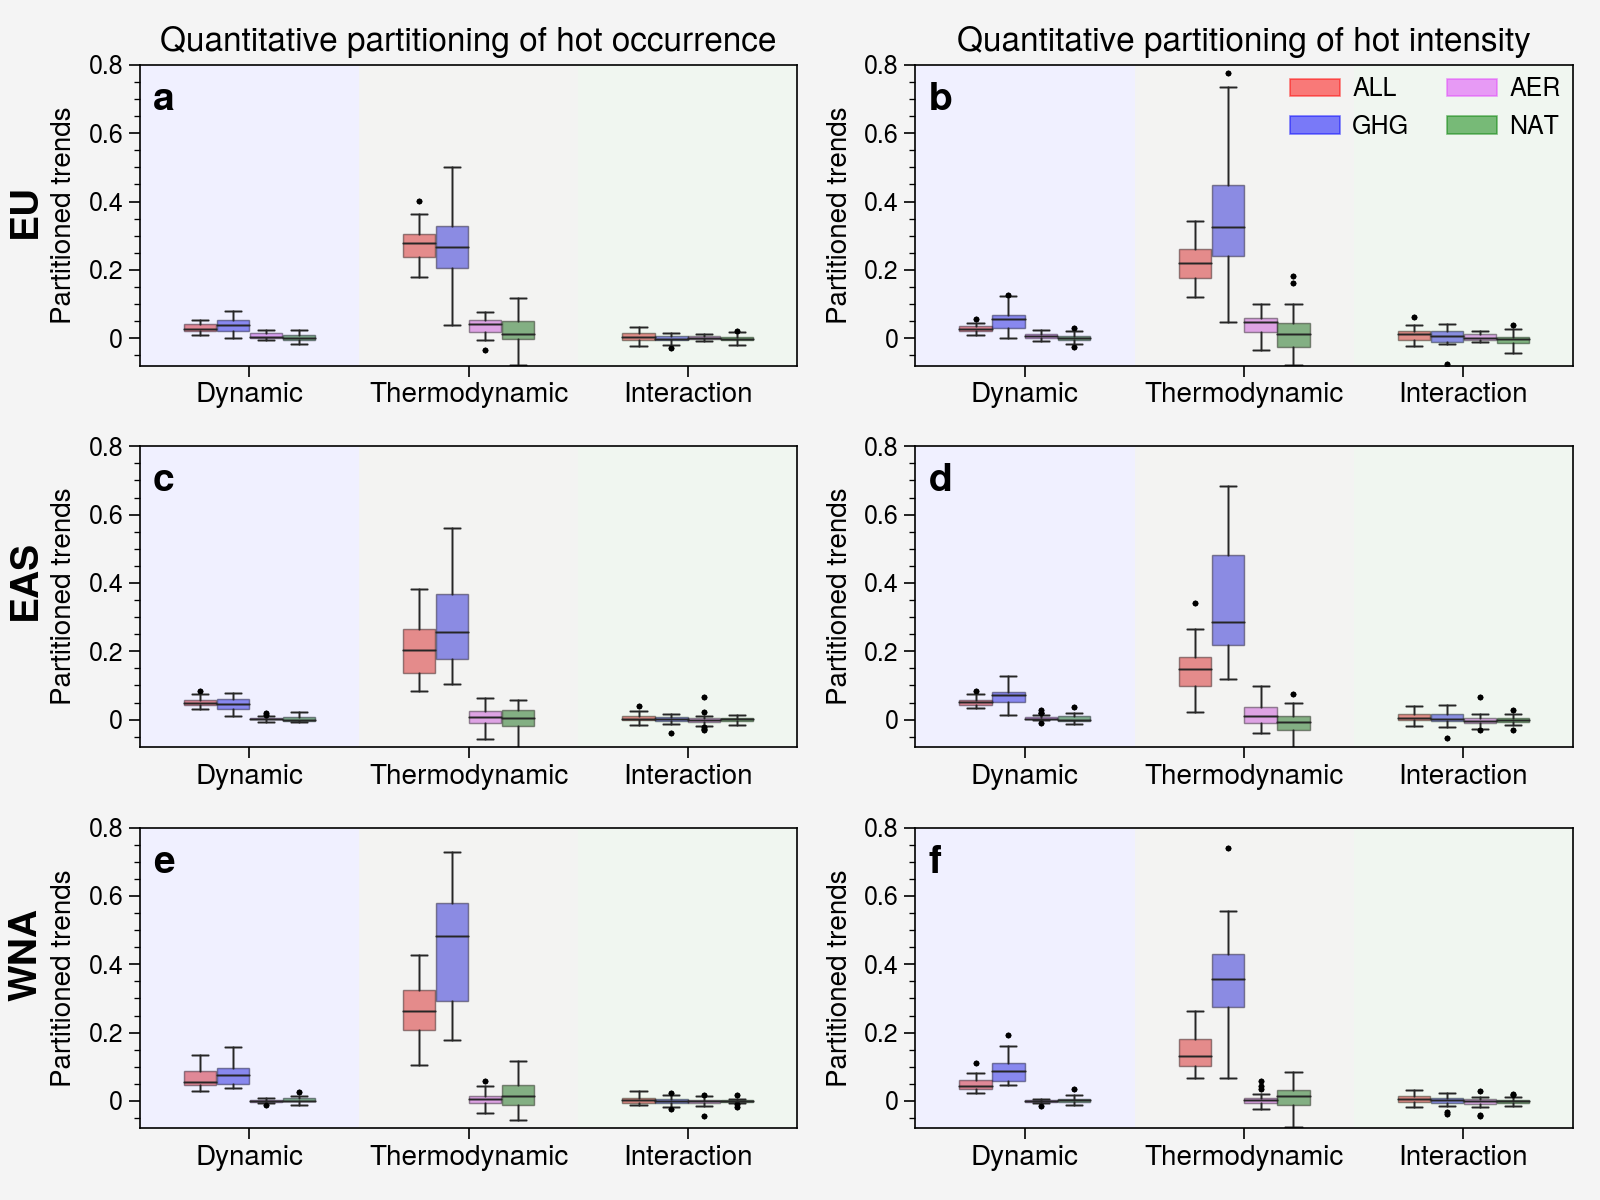

In [ ]:
scaling_factor_and_trends_3sig = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/scripts/attribution_Ribes/trends_scaling_factors_Ribes_GPH.csv',index_col=0)
scaling_factor_and_trends_3sig['trend'] = scaling_factor_and_trends_3sig['trend'] * 2
scaling_factor_and_trends_3sig['trend_min'] = scaling_factor_and_trends_3sig['trend_min'] * 2
scaling_factor_and_trends_3sig['trend_max'] = scaling_factor_and_trends_3sig['trend_max'] * 2

fig, axes = plt.subplots(3, 2, sharex=False, figsize=(8,6), gridspec_kw={'width_ratios': [3, 3]})
pattern_num = {'Pattern 1':0,'Pattern 2':1,'Pattern 3':2,'Pattern 4':3}
regions = ['EU','EAS','WNA']
# color_f = ['#abc9ea','#efb792','#98daa7','#f3aba8']
color_f = ['red','blue','#E040FB','green']
jitters = {'era5':-0.3,'jra55':0,'ncep2':0.3}
hatchs = {'era5':'////','jra55':'xxx','ncep2':'oo'}
# plt.grid(b=None)
flierprops = dict(marker='.', markerfacecolor='None', markersize=2,  markeredgecolor='black')

for r in range(len(regions)):

    domain = regions[r]
    patt_clss = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/procData/partitioned_trends_' + domain + '_intensity.csv')
    patt_clss_occ = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/procData/partitioned_trends_' + domain + '_occurrence.csv')

    for obs in ['era5','jra55','ncep2']:

        ax1 = sns.boxplot(
            x='partition',y='trend',hue='forcing',dodge=True,
            data=patt_clss_occ,order=['Dynamic','Thermodynamic','Interaction'],
            hue_order=['historical','hist-GHG','hist-aer','hist-nat'],flierprops=flierprops,
            palette=color_f,width=0.6,linewidth=0.5,ax = axes[r,0],boxprops=dict(alpha=.2))
        ax1.bar([0,1,2],[2,2,2],width=[1],color=['blue','#4E342E','green'],alpha=0.02)
        ax1.bar([0,1,2],[-2,-2,-2],width=[1],color=['blue','#4E342E','green'],alpha=0.02)
        ax1.set(ylim=(-0.08,0.8))
        ax1.set(xlim=(-0.5, 2.5))
        ax1.set_ylabel('Partitioned trends',fontdict={'fontsize':10})
        # yticklabels = ax1.get_yticklabels()
        # ax1.set_yticklabels(yticklabels,fontdict={'fontsize':9})
        xticklabels = ax1.get_xticklabels()
        ax1.set_xticklabels(xticklabels,fontdict={'fontsize':10})
        ax1.xaxis.label.set_visible(False)
        ax1.xaxis.set_tick_params(which='minor', bottom=False) # turn off xaxis minor ticks
        ax1.grid(False)
        ax1.get_legend().remove()

        ax2 = sns.boxplot(
            x='partition',y='trend',hue='forcing',dodge=True,
            data=patt_clss,order=['Dynamic','Thermodynamic','Interaction'],
            hue_order=['historical','hist-GHG','hist-aer','hist-nat'],flierprops=flierprops,
            palette=color_f,width=0.6,linewidth=0.5,ax = axes[r,1],boxprops=dict(alpha=.2))
        ax2.bar([0,1,2],[2,2,2],width=[1],color=['blue','#4E342E','green'],alpha=0.02)
        ax2.bar([0,1,2],[-2,-2,-2],width=[1],color=['blue','#4E342E','green'],alpha=0.02)
        ax2.set(ylim=(-0.08,0.8))
        ax2.set(xlim=(-0.5, 2.5))
        ax2.set_ylabel('Partitioned trends',fontdict={'fontsize':10})
        # yticklabels = ax2.get_yticklabels()
        # ax2.set_yticklabels(yticklabels,fontdict={'fontsize':9})
        xticklabels = ax2.get_xticklabels()
        ax2.set_xticklabels(xticklabels,fontdict={'fontsize':10})
        ax2.xaxis.label.set_visible(False)
        ax2.xaxis.set_tick_params(which='minor', bottom=False) # turn off xaxis minor ticks
        ax2.grid(False)
        ax2.get_legend().remove()

handles, labels = ax1.get_legend_handles_labels()
labels = ['ALL','GHG','AER','NAT'] 

legend_elements = [
    Patch(facecolor=color_f[0], edgecolor=color_f[0],label='ALL',alpha=0.5),
    Patch(facecolor=color_f[1], edgecolor=color_f[1],label='GHG',alpha=0.5),
    Patch(facecolor=color_f[2], edgecolor=color_f[2],label='AER',alpha=0.5),
    Patch(facecolor=color_f[3], edgecolor=color_f[3],label='NAT',alpha=0.5)]
handles = legend_elements
axes[0,1].legend(handles,labels,frameon=False,ncol=2,fontsize = 'medium', fancybox = True, loc='upper right') #bbox_to_anchor=[1.01,0.7],

anchor_x = 0.02
anchor_y = 0.85
axes[0,0].text(anchor_x,anchor_y,'a',fontdict={'fontsize':14,'weight':'bold'}, transform=axes[0,0].transAxes)
axes[0,1].text(anchor_x,anchor_y,'b',fontdict={'fontsize':14,'weight':'bold'}, transform=axes[0,1].transAxes)
axes[1,0].text(anchor_x,anchor_y,'c',fontdict={'fontsize':14,'weight':'bold'}, transform=axes[1,0].transAxes)
axes[1,1].text(anchor_x,anchor_y,'d',fontdict={'fontsize':14,'weight':'bold'}, transform=axes[1,1].transAxes)
axes[2,0].text(anchor_x,anchor_y,'e',fontdict={'fontsize':14,'weight':'bold'}, transform=axes[2,0].transAxes)
axes[2,1].text(anchor_x,anchor_y,'f',fontdict={'fontsize':14,'weight':'bold'}, transform=axes[2,1].transAxes)

anchor_x = -0.2
anchor_y = 0.45
axes[0,0].text(anchor_x,anchor_y,'EU',fontdict={'fontsize':14,'weight':'bold'}, transform=axes[0,0].transAxes,rotation=90)
axes[1,0].text(anchor_x,anchor_y,'EAS',fontdict={'fontsize':14,'weight':'bold'}, transform=axes[1,0].transAxes,rotation=90)
axes[2,0].text(anchor_x,anchor_y,'WNA',fontdict={'fontsize':14,'weight':'bold'}, transform=axes[2,0].transAxes,rotation=90)

axes[0,0].set_title('Quantitative partitioning of hot occurrence',fontdict={'fontsize':12})
axes[0,1].set_title('Quantitative partitioning of hot intensity',fontdict={'fontsize':12})

plt.tight_layout()
fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/HWdna_figure_res/'
fig.savefig(fig_dir+'FigS14_partitioned_trends_in_hot_extreme.pdf')


In [ ]:
import pandas as pd
for d in ['EU','EAS','WNA']:
    domain = d
    patt_clss = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/procData/partitioned_trends_' + domain + '_' + 'intensity.csv',index_col=0)
    for f in ['historical','hist-aer','hist-nat','hist-GHG']: #'historical',,'hist-aer','hist-nat'
        for p in ['Dynamic']: #'Dynamic','Interaction'
            rc = patt_clss[(patt_clss['forcing']==f) & (patt_clss['partition']==p)]['contribution'].median()
            print(d + '_' + f + '_' + p + ': ' + str(rc))

EU_historical_Dynamic: 10.762827581911257
EU_hist-aer_Dynamic: 12.739219772324837
EU_hist-nat_Dynamic: 5.236872814010368
EU_hist-GHG_Dynamic: 12.785227355618431
EAS_historical_Dynamic: 25.849677366689548
EAS_hist-aer_Dynamic: 6.990997859404493
EAS_hist-nat_Dynamic: 6.944108078504824
EAS_hist-GHG_Dynamic: 19.560848977144758
WNA_historical_Dynamic: 23.98885804975234
WNA_hist-aer_Dynamic: 3.351491109440449
WNA_hist-nat_Dynamic: 15.538130150136647
WNA_hist-GHG_Dynamic: 19.235242210220797


In [ ]:
for d in ['EU','EAS','WNA']:
    domain = d
    patt_clss = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/procData/partitioned_trends_' + domain + '_occurrence.csv',index_col=0)
    for f in ['historical','hist-GHG']: #,'hist-aer','hist-nat'
        for p in ['Thermodynamic','Dynamic','Interaction']:
            rc = patt_clss[(patt_clss['forcing']==f) & (patt_clss['partition']==p)]['contribution'].median()
            print(d + '_' + f + '_' + p + ': ' + str(rc))

EU_historical_Thermodynamic: 89.48205784199396
EU_historical_Dynamic: 10.13081404664853
EU_historical_Interaction: 1.0250261691440536
EU_hist-GHG_Thermodynamic: 88.90059814352917
EU_hist-GHG_Dynamic: 11.781318216910357
EU_hist-GHG_Interaction: -0.446652902946927
EAS_historical_Thermodynamic: 76.94931383202308
EAS_historical_Dynamic: 20.133399356442254
EAS_historical_Interaction: 1.06595818892463
EAS_hist-GHG_Thermodynamic: 84.63721260258455
EAS_hist-GHG_Dynamic: 14.652092984669494
EAS_hist-GHG_Interaction: 0.5880455430517559
WNA_historical_Thermodynamic: 79.87655534828336
WNA_historical_Dynamic: 19.46102067055598
WNA_historical_Interaction: 0.6252653255500895
WNA_hist-GHG_Thermodynamic: 84.28995942179169
WNA_hist-GHG_Dynamic: 14.708288569361937
WNA_hist-GHG_Interaction: -0.2805893402013804


In [ ]:
for d in ['EU','EAS','WNA']:
    domain = d
    patt_clss = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/procData/partitioned_trends_' + domain + '_intensity.csv',index_col=0)
    for f in ['historical','hist-GHG']: #,'hist-aer','hist-nat'
        for p in ['Thermodynamic','Dynamic','Interaction']:
            rc = patt_clss[(patt_clss['forcing']==f) & (patt_clss['partition']==p)]['contribution'].median()
            print(d + '_' + f + '_' + p + ': ' + str(rc))

EU_historical_Thermodynamic: 84.39593461887029
EU_historical_Dynamic: 10.762827581911257
EU_historical_Interaction: 4.456054663105551
EU_hist-GHG_Thermodynamic: 84.20496396241322
EU_hist-GHG_Dynamic: 12.785227355618431
EU_hist-GHG_Interaction: 1.4145663602296699
EAS_historical_Thermodynamic: 71.69629073894548
EAS_historical_Dynamic: 25.849677366689548
EAS_historical_Interaction: 3.140052491553158
EAS_hist-GHG_Thermodynamic: 78.2555504231843
EAS_hist-GHG_Dynamic: 19.560848977144758
EAS_hist-GHG_Interaction: 1.107630928625839
WNA_historical_Thermodynamic: 72.17929974427858
WNA_historical_Dynamic: 23.98885804975234
WNA_historical_Interaction: 2.8271273017373653
WNA_hist-GHG_Thermodynamic: 80.72823810303524
WNA_hist-GHG_Dynamic: 19.235242210220797
WNA_hist-GHG_Interaction: 0.8965034712643078
